In [1]:
def plot_metrics(jsonl_data, configs, write_to_path=None, report_to=[], wandb_name=None):
    # Collect data into a list
    data = []
    for config in configs:
        evaluator_name = config['evaluator_name']
        metric_name = config['metric_name']
        y_label = config['y_label']
        use_log_scale = config['use_log_scale']
        
        for entry in jsonl_data:
            results = entry.get('results', {}).get(evaluator_name, {})
            for method, res in results.items():
                factors = res.get('factor', [])
                metrics = res.get(metric_name, [])
                # Ensure factors and metrics are lists
                if not isinstance(factors, list):
                    factors = [factors]
                if not isinstance(metrics, list):
                    metrics = [metrics]
                for f, m in zip(factors, metrics):
                    data.append({
                        'Factor': f,
                        'Value': m,
                        'Method': method,
                        'Metric': y_label,
                        'UseLogScale': use_log_scale
                    })

    # Create DataFrame and average metrics
    df = pd.DataFrame(data)
    df = df.groupby(['Method', 'Factor', 'Metric', 'UseLogScale'], as_index=False).mean()

    # Apply log transformation if needed
    df['TransformedValue'] = df.apply(
        lambda row: np.log10(row['Value']) if row['UseLogScale'] else row['Value'],
        axis=1
    )

    # Create the plot
    p = (
        ggplot(df, aes(x='Factor', y='TransformedValue', color='Method', group='Method')) +
        geom_line() +
        geom_point() +
        theme_bw() +
        labs(x='Factor', y='Value') +
        facet_wrap('~ Metric', scales='free_y', nrow=1) +  # Plots in a row
        theme(
            subplots_adjust={'wspace': 0.1},
            figure_size=(1.5 * len(configs), 3),  # Wider for more plots, taller height
            legend_position='right',
            legend_title=element_text(size=4),
            legend_text=element_text(size=6),
            axis_title=element_text(size=6),
            axis_text=element_text(size=6),
            axis_text_x=element_text(rotation=90, hjust=1),  # Rotate x-axis labels
            strip_text=element_text(size=6)
        )
    )
    p.show()


In [2]:
def combine_scores_per_concept(concept_data):
    """Combine scores from concept and following evaluators for each method."""
    return concept_data["results"]["LMJudgeEvaluator"]

In [3]:
def process_jsonl_file(jsonl_lines):
    for data in jsonl_lines:
        data["results"]["LMJudgeEvaluator"] = \
            combine_scores_per_concept(data)
    return jsonl_lines

In [4]:
def load_jsonl(jsonl_path):
    """
    Load data from a JSON lines file.
    """
    jsonl_data = []
    with open(jsonl_path, 'r') as f:
        for line in f:
            data = json.loads(line)
            jsonl_data += [data]
    return jsonl_data

In [5]:
def plot_steering(aggregated_results, report_to=[], wandb_name=None):
        configs = [
            {
                'evaluator_name': 'PerplexityEvaluator',
                'metric_name': 'perplexity',
                'y_label': 'Perplexity',
                'use_log_scale': False
            },
            {
                'evaluator_name': 'LMJudgeEvaluator',
                'metric_name': 'relevance_concept_ratings',
                'y_label': 'Concept',
                'use_log_scale': False
            },
            {
                'evaluator_name': 'LMJudgeEvaluator',
                'metric_name': 'relevance_instruction_ratings',
                'y_label': 'Instruct',
                'use_log_scale': False
            },
            {
                'evaluator_name': 'LMJudgeEvaluator',
                'metric_name': 'fluency_ratings',
                'y_label': 'Fluency',
                'use_log_scale': False
            },
            {
                'evaluator_name': 'LMJudgeEvaluator',
                'metric_name': 'lm_judge_rating',
                'y_label': 'Aggregated',
                'use_log_scale': False
            },
            {
                'evaluator_name': 'PerplexityEvaluator',
                'metric_name': 'strength',
                'y_label': 'Strength',
                'use_log_scale': False
            },
        ]
        plot_metrics(jsonl_data=aggregated_results, configs=configs, write_to_path=None, report_to=report_to, wandb_name=wandb_name)

/nlp/scr/qinanyu/miniconda3/envs/sup/lib/python3.13/site-packages/plotnine/themes/themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


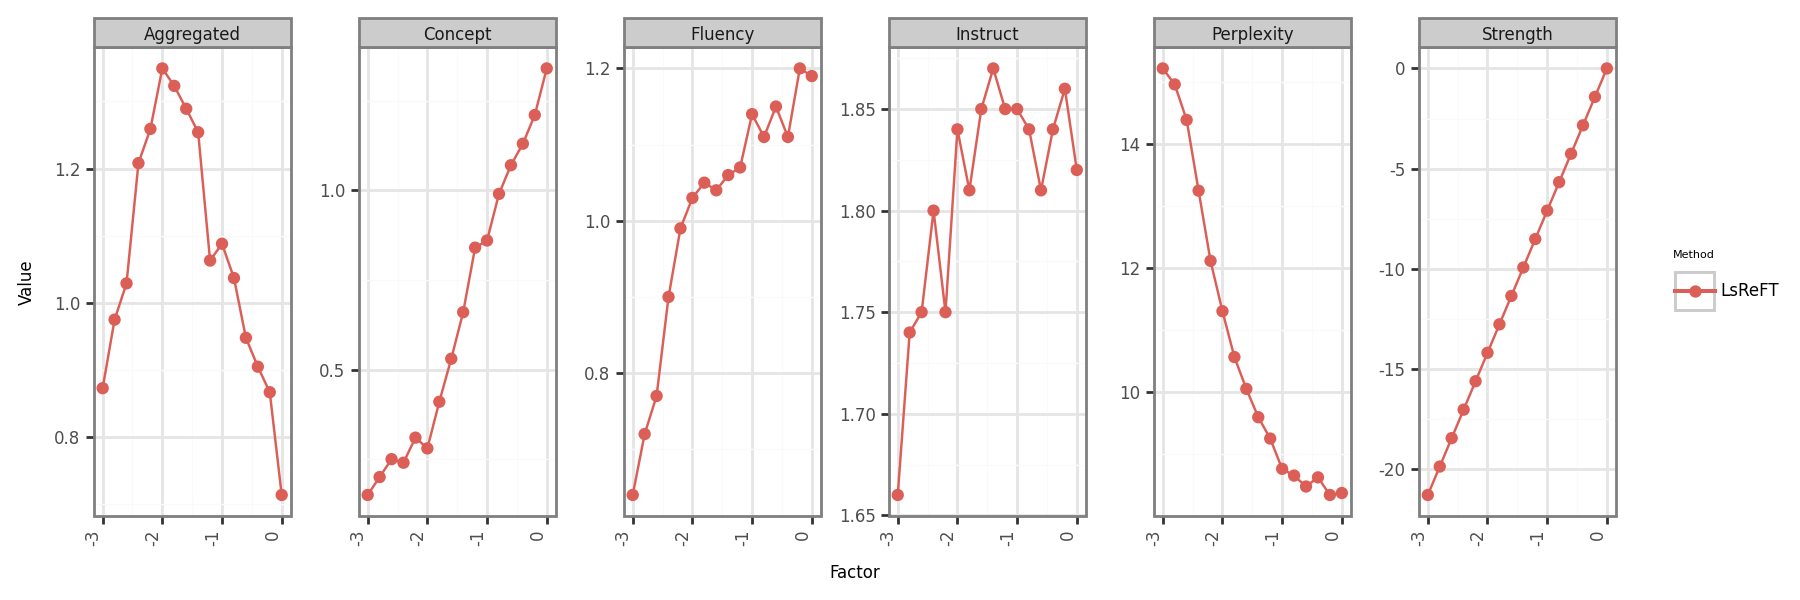

In [6]:
import json
import pandas as pd
from plotnine import (
    ggplot, aes, geom_line, geom_point, facet_wrap, geom_bar, geom_abline, xlim, scale_fill_manual,
    geom_text, position_dodge, ylim, labs, theme_bw, theme, element_text, scale_color_manual, coord_flip
)
plot_steering(process_jsonl_file(load_jsonl("/afs/cs.stanford.edu/u/qinanyu/axbench/axbench/output_llama/layer_20_concise/lsreft_noise_100_20/evaluate/steering.jsonl")))

In [7]:
file1 = process_jsonl_file(load_jsonl("/afs/cs.stanford.edu/u/qinanyu/axbench/axbench/output_llama/layer_20_concise/lsreft_noise_100_20/evaluate/steering.jsonl"))

In [83]:
file2 = process_jsonl_file(load_jsonl("/afs/cs.stanford.edu/u/qinanyu/axbench/axbench/output_llama/layer_20_concise/lsreft_200_noise_20/evaluate/steering.jsonl"))

In [96]:
file4 = process_jsonl_file(load_jsonl("/afs/cs.stanford.edu/u/qinanyu/axbench/axbench/output_llama/layer_20_concise/lsreft_20/evaluate/steering.jsonl"))

In [97]:
file3 = process_jsonl_file(load_jsonl("/afs/cs.stanford.edu/u/qinanyu/axbench/axbench/output_llama/layer_20_concise/lsreft_noise_10_20/evaluate/steering.jsonl"))

In [103]:
file5 = process_jsonl_file(load_jsonl("/afs/cs.stanford.edu/u/qinanyu/axbench/axbench/output_llama/layer_20_concise/lsreft_200_noise_prompt_20/evaluate/steering.jsonl"))

In [12]:
file6 = process_jsonl_file(load_jsonl("/afs/cs.stanford.edu/u/qinanyu/axbench/axbench/output_llama/layer_20_concise/lsreft_addition/evaluate/steering.jsonl"))

In [13]:
file7 = process_jsonl_file(load_jsonl("/afs/cs.stanford.edu/u/qinanyu/axbench/axbench/output_llama/test_gating_2/lsreft_200_factor_shuffle_3_20/evaluate/steering.jsonl"))

In [14]:
l = [ file6, file7]
name = ["gating", "basic addition"]
base = file6
ne = []
for idx, concept in enumerate(base):
    ne.append({"concept_id": idx+1, "results": {}})
    for k, v in concept.items():
        for k_r, v_r in concept["results"].items():
            for k_e, v_e in v_r.items():
                ne[idx]['results'][k_r] = {}
                    
for p in range(len(l)):
    for idx, concept in enumerate(l[p]):
        for k, v in concept.items():
            for k_r, v_r in concept["results"].items():
                for k_e, v_e in v_r.items():
                    ne[idx]["results"][k_r][name[p]] = l[p][idx]["results"][k_r][k_e]

/nlp/scr/qinanyu/miniconda3/envs/sup/lib/python3.13/site-packages/plotnine/themes/themeable.py:2438: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


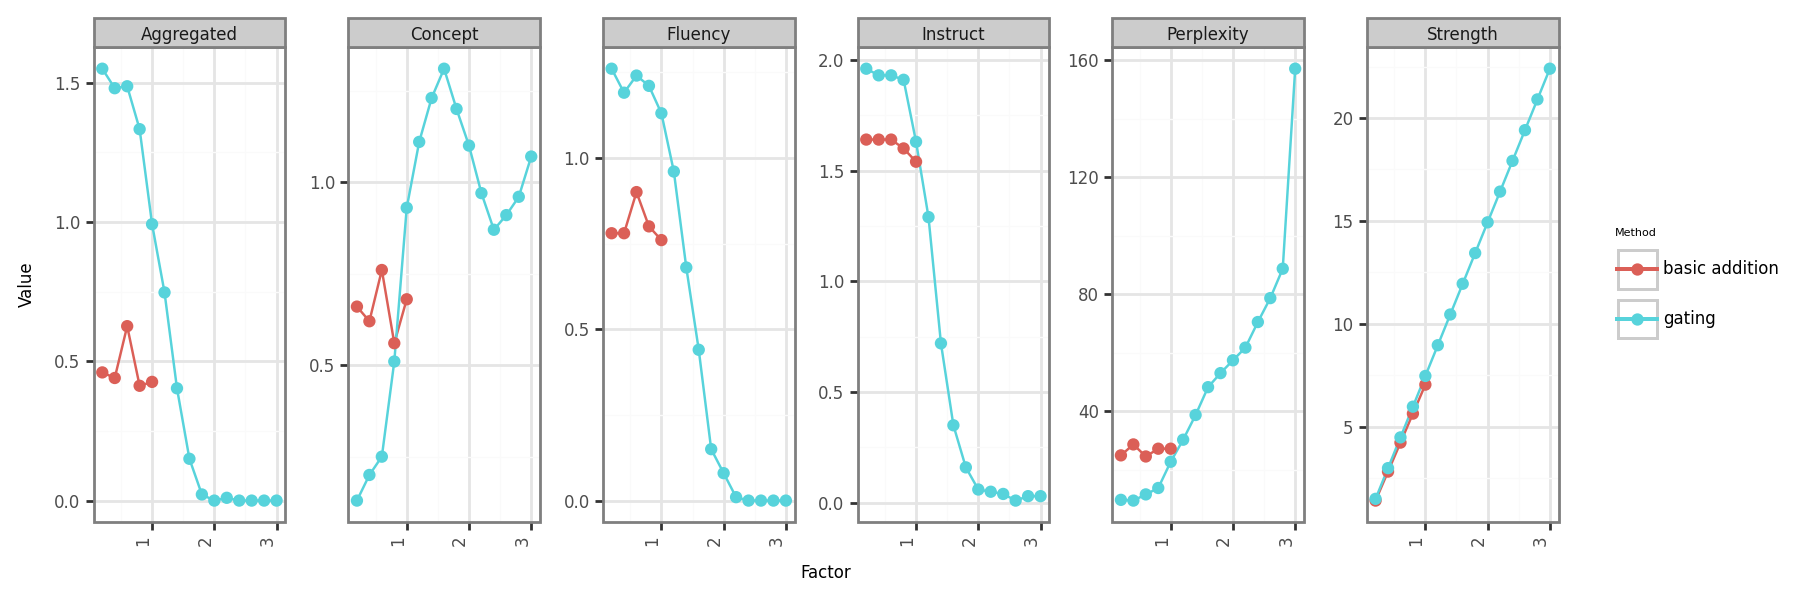

In [15]:
plot_steering(process_jsonl_file(ne))

In [16]:
fi = ['lsreft_addition_20', 'lsreft_20', 'lsreft_anneal_20']
l = [process_jsonl_file(load_jsonl(f"/afs/cs.stanford.edu/u/qinanyu/axbench/axbench/output_llama/layer_20_concise/{i}/evaluate/steering.jsonl")) for i in fi]
name = ["addition", "threshold", "gating"]
base = file1
ne = []
for idx, concept in enumerate(base):
    ne.append({"concept_id": idx+1, "results": {}})
    for k, v in concept.items():
        for k_r, v_r in concept["results"].items():
            for k_e, v_e in v_r.items():
                ne[idx]['results'][k_r] = {}
                    
for p in range(len(l)):
    for idx, concept in enumerate(l[p]):
        for k, v in concept.items():
            for k_r, v_r in concept["results"].items():
                for k_e, v_e in v_r.items():
                    ne[idx]["results"][k_r][name[p]] = l[p][idx]["results"][k_r][k_e]
plot_steering(process_jsonl_file(ne))

NameError: name 'file1' is not defined